### 0. Goals of this project
##### - Build a model using Linear Regression (LR) to predict house prices given its characteristics.
##### - Learn to use different metrics to determine the accuracy of the model.
##### - Develop an interactive dashboard to highlight relevant information.

### 1. Imports and Data Set Information

This step is a good way to start your project. You immediately have access to a lot of important information.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #for ML model


In [161]:
original_df = pd.read_csv('Housing.csv')
df = original_df.copy(deep=True)

In [162]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [164]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [165]:
median_house_price = round(df['price'].median(), 2)
mean_house_price = round(df['price'].mean(),2 )

print("Median house price: ", median_house_price)
print("Mean house price: ", mean_house_price)

if median_house_price < mean_house_price:
    print('Median is higher than mean. Distribution is probably right-tail skewed')
elif median_house_price > mean_house_price:
    print('Median is lower than mean. Distribution is probably left-tail skewed')
else:
    print('Median and mean house prices are equal')

print("To be confirmed in data preprocessing")


Median house price:  4340000.0
Mean house price:  4766729.25
Median is higher than mean. Distribution is probably right-tail skewed
To be confirmed in data preprocessing


A right-tail distribution indicates our dataset has a higher concentration of points around the lower-end of the price range, but the mean is being pulled up by the higher priced houses. We must take this into account when training our model. 

### 2. Checking for missing values

It's always a good idea to make sure the entries are usable and relevant by checking them.

In [166]:
original_count = len(df['price'])
df_copy_count = len(df.dropna(axis=0, inplace=False)) #dropping any empty rows in a dataset copy
num_rows_dropped = original_count- df_copy_count
print(num_rows_dropped)

#No null values 

0


In [167]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 3. Exploratory Data Analysis

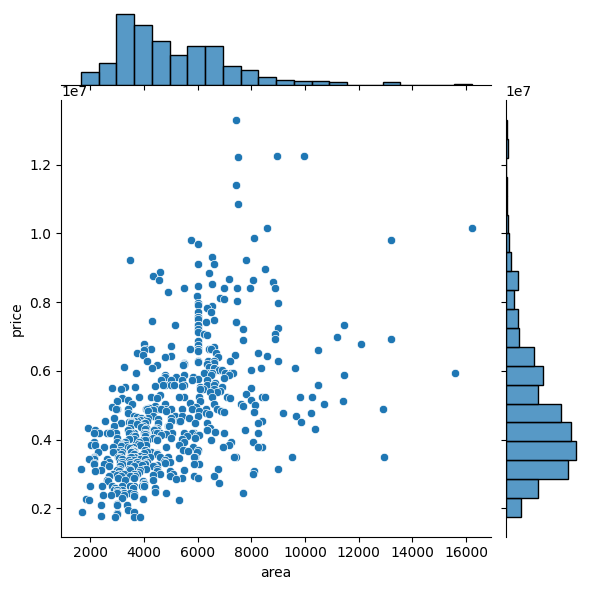

In [168]:
#Quick example
sns.jointplot(x= 'area', y ='price', data= df)

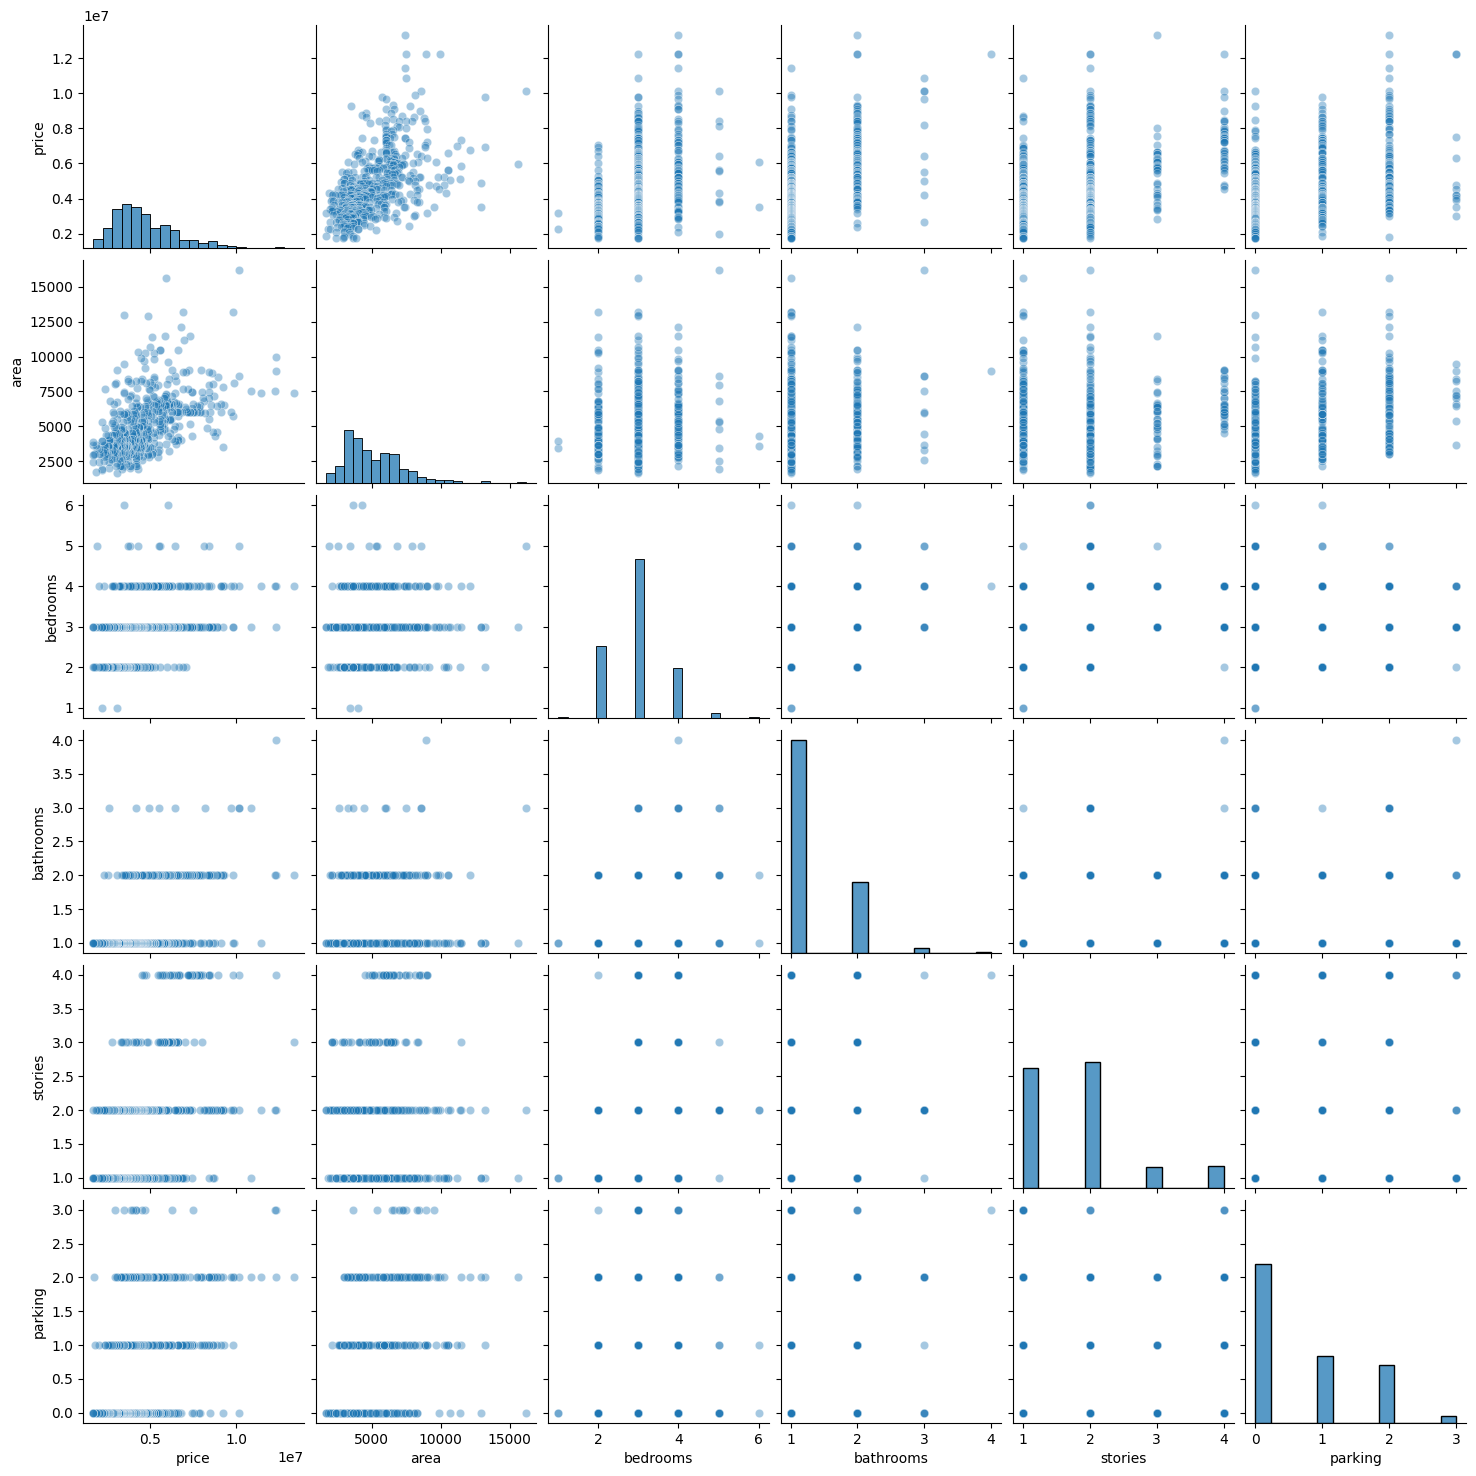

In [169]:
#Using pairplot because there are not that many columns with numerical entries
sns.pairplot(df, kind = 'scatter', plot_kws ={'alpha': 0.4} )

##### Thoughts from graphs

The dataset has a higher concentration of data points for houses around the $200 000 - $600 000 price range. This could negatively affect our model; It would have a harder predicting 
higher costing houses, due to it having less data to rely on. This in turn adds more weight to outliers.

To negate the outliers' effect, I will separate the dataset using stratification in Step 3 (Data Wrangling). 

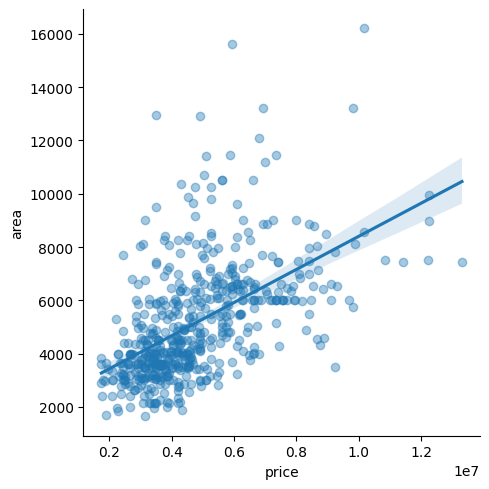

In [170]:
#Simple Linear Model plot to strenghten my point
sns.lmplot(x = 'price',
           y = 'area',
           data = df,
           scatter_kws = {'alpha': 0.4})

### Step 4: Data Wrangling

##### 4.1 Transforming categorical variables

In [171]:
#First, use a binary mapping for any binary categories (yes/no columns)
#and One-Hot Encoding for non-binary categories

yes_no_binary_mapping = {'no': 0, 'yes':1}
cols_for_binary_mapping = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']


In [172]:
#applying binary mapping
mapped_cols = df[cols_for_binary_mapping].map(lambda x: yes_no_binary_mapping[x]) #a new series
df = df.drop(cols_for_binary_mapping, axis=1)

In [173]:
df = pd.concat([df, mapped_cols], axis=1)
df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,13300000,7420,4,2,3,2,furnished,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,furnished,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,semi-furnished,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,furnished,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,unfurnished,1,0,1,0,0,0
541,1767150,2400,3,1,1,0,semi-furnished,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,unfurnished,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,furnished,0,0,0,0,0,0


In [174]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas') 
ohetransform = ohe.fit_transform(df[['furnishingstatus']])

In [175]:
df = pd.concat([df, ohetransform], axis=1)

In [176]:
df = df.drop('furnishingstatus', axis=1)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0.0,1.0,0.0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0.0,0.0,1.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.0,1.0,0.0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0.0,0.0,1.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1.0,0.0,0.0


##### 4.2 Splitting Predicting and Target variables

In [177]:
#Want a df with only influencing factors -> create a deep copy and drop the the target variable

X = df.drop('price', axis=1, inplace=False) #i.e. pricing factors
y = df.copy(deep = True)['price']

In [178]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 5. Building the Model

In [179]:
#training the model

from sklearn.linear_model import LinearRegression

lm = LinearRegression() #instance of our model
lm.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [180]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'] )
cdf

,Coef
area,2.532873e+02
bedrooms,8.089314e+04
bathrooms,1.114751e+06
stories,4.172676e+05
parking,3.031112e+05
mainroad,4.080737e+05
guestroom,2.757105e+05
basement,4.826035e+05
hotwaterheating,6.163754e+05
airconditioning,6.858393e+05


In [181]:
#predictions
predictions_test = lm.predict(X_test)
predictions_train = lm.predict(X_train) #for evaluating later on
print(len(y_test))

164


Text(0.5, 1.0, 'Evaluation of our LN Model')

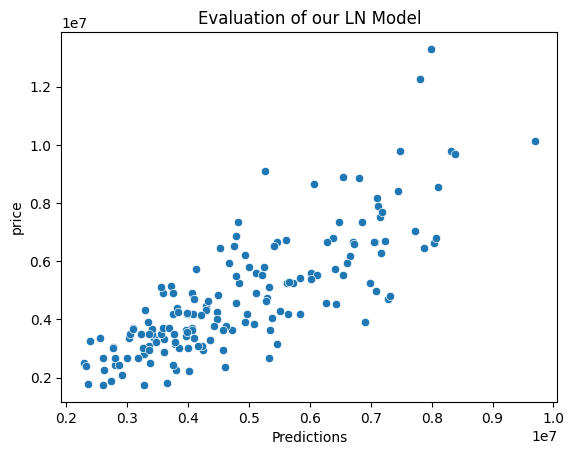

In [182]:
#The straighter the scatter, the better our model
sns.scatterplot(x= predictions_test, y= y_test)
plt.xlabel('Predictions')
plt.title('Evaluation of our LN Model')

In [183]:
def relative_MAE(MAE, mean_for_target_val):
    rel_MAE = round((MAE/mean_for_target_val), 2) * 100

    return rel_MAE

In [184]:
#Evaluating the model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)


train_MAE = mean_absolute_error(y_train, predictions_train)
train_RMSE = math.sqrt(mean_squared_error(y_train, predictions_train))
test_MAE = mean_absolute_error(y_test, predictions_test)
test_RMSE =  math.sqrt(mean_squared_error(y_test, predictions_test))
diff_RMSE = abs(train_RMSE - test_RMSE)

test_set_rel_MAE = relative_MAE(test_MAE, mean_house_price)



In [185]:
print("Training R²:", r2_train)
print("Test R²:", r2_test)

print('Train Mean Absolute Error: ', train_MAE)
print("Train Root Mean Squared Error: ", train_RMSE)
print("Test Mean Absolute Error: ", test_MAE)
print("Test Root Mean Squared Error: ", test_RMSE)
print("The relative MAE for the test set is", test_set_rel_MAE, "%")
#print("The difference between the train RMSE and test RMSE is", diff_RMSE )

Training R²: 0.6931989807027312
Test R²: 0.6463350878895876
Train Mean Absolute Error:  720245.1987194599
Train Root Mean Squared Error:  981751.1802021731
Test Mean Absolute Error:  920392.9397607958
Test Root Mean Squared Error:  1234106.749637685
The relative MAE for the test set is 19.0 %


#### Evaluation of metrics
**1. Differences between RMSE and MAE for the training and test dataset** <br>
There are large differences between the training set's RMSE and MAE with the test set's RMSE and MAE. This could be due to how the dataset was split, as in the distribution for each subset are not equal.<br>
    Potential fix: Apply stratification while splitting the dataset.


**2. Value of test set's MAE value** <br>
The test set has a MAE of $920 392.94, which means, on average, the model will be off by more than $920 000 (or 19% ) when predicting house prices.<br>
    Potential fix: Improve accuracy using cross-validation (check how well the model fits the data) and apply log-transformation to reduce the weight of outliers. 

In [186]:
def calculate_relative_gap_percent(rmse1, rmse2, denom):

    gap = abs((rmse1-rmse2)/ denom)

    return round(gap, 4) * 100

Because the training RMSE is much lower than the test RMSE, we know the model is overfitting (i.e. it is not generalizing properly to new/unseen data). To reduce overfitting, I will add a cross-validaton feature and split the test dataset into two: validation and test

In [187]:
#Second Model

#House prices are skewed if the score is >1
print(y.skew())
lm2 = LinearRegression()


1.2122388370279802


Another feature I will add is stratification; i.e. splitting the dataset into training/validation/test sets where the target variable (house price) for each subset has a similar distribution to the original set.

In [188]:
#Use stratification when splitting the data set 
n_bins = 6
price_bins = pd.qcut(df['price'], q=5, labels = False)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=price_bins, random_state=42)
bins_temp = price_bins.loc[X_temp.index]
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=bins_temp, random_state=42) 


Because y is skewed towards the right, use log-transform on y to reduce the impact of outliers on the model

In [189]:
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

In [190]:
lm2.fit(X_train, y_train_log)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [191]:
cdf = pd.DataFrame(lm2.coef_, X.columns, columns= ['Coefficents'])
cdf

,Coefficents
area,0.000051
bedrooms,0.035972
bathrooms,0.149043
stories,0.099432
parking,0.033741
mainroad,0.108207
guestroom,0.050639
basement,0.081296
hotwaterheating,0.169424
airconditioning,0.173423


In [192]:
#Calculating RMSE in log-space 

#standard k-fold cross-validation 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

kf2 = KFold(n_splits=15, shuffle=True, random_state=42)
scores = cross_val_score(lm2, X_train, y_train_log.values.ravel(), cv=kf2, scoring = 'neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)


y_cross_val_pred = cross_val_predict(lm2, X_train, y_train_log, cv = kf2) #predictions for y_train with cross-val

cv_rmse = np.sqrt(mean_squared_error(y_train, np.exp(y_cross_val_pred)))

print("Mean CV RMSE: " , cv_rmse ) #Remember for later

Mean CV RMSE:  1076037.7461784605


In [193]:
#predictions for lm2 (validation set)
y_train_pred_log = lm2.predict(X_train)
y_val_pred_log = lm2.predict(X_val)

#Convert units out of log space
y_train_pred = np.exp(y_train_pred_log) 
y_val_pred = np.exp(y_val_pred_log)


In [194]:
#Note
#We compare the training RMSE to the CV RMSE to see how well our model generalized the data it saw
#We then compare the validation set's RMSE to the CV RMSE for hypertuning the parameters

In [195]:
#To see how well our model generelizes information, we want to compare the KFold RMSE to the training set's RMSE

train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))


cv_train_rmse_gap = calculate_relative_gap_percent(cv_rmse, train_RMSE, mean_house_price)
cv_val_rmse_gap = calculate_relative_gap_percent(cv_rmse, val_rmse, mean_house_price)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_val, y_val_pred)

print("Training R²:", r2_train)
print("Test R²:", r2_test)

print("Training set RMSE: ", train_rmse)
#Because the training RMSE and CV RMSE are relatively close (withing 2 to 3% of each other), we can say the model does not seem to overfit.

print("Validation set RMSE: ", val_rmse)
print("Relative gap between CV RMSE and training set's RMSE: ", cv_train_rmse_gap, "%")
print("Relative gap between CV RMSE and validation set's RMSE: ", cv_val_rmse_gap, "%")


Training R²: 0.700851922097324
Test R²: 0.6937475737012007
Training set RMSE:  1027693.6044216523
Validation set RMSE:  1116240.5027585016
Relative gap between CV RMSE and training set's RMSE:  1.9800000000000002 %
Relative gap between CV RMSE and validation set's RMSE:  0.84 %


In [200]:
#Evaluating the model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_val, y_val_pred)


train_MAE = mean_absolute_error(y_train, y_train_pred)
train_RMSE = math.sqrt(mean_squared_error(y_train, y_train_pred))
val_MAE = mean_absolute_error(y_val, y_val_pred)
val_RMSE =  math.sqrt(mean_squared_error(y_val, y_val_pred))
diff_RMSE = abs(train_RMSE - val_RMSE)

val_set_rel_MAE = relative_MAE(val_MAE, mean_house_price)

In [ ]:
print("Training R²:", r2_train)
print("Test R²:", r2_test)

print('Train Mean Absolute Error: ', train_MAE)
print("Train Root Mean Squared Error: ", train_RMSE)
print("Test Mean Absolute Error: ", val_MAE)
print("Test Root Mean Squared Error: ", val_RMSE)
print("The relative MAE for the validation set is", val_set_rel_MAE, "%")
#print("The difference between the train RMSE and test RMSE is", diff_RMSE )

Training R²: 0.700851922097324
Test R²: 0.6937475737012007
Train Mean Absolute Error:  728177.5073196988
Train Root Mean Squared Error:  1027693.6044216523
Test Mean Absolute Error:  777980.3947874729
Test Root Mean Squared Error:  1116240.5027585016
The relative MAE for the test set is 16.0 %


##### Thoughts

Relative gap between CV RMSE and training set's RMSE:  0.27999999999999997 %
Relative gap between CV RMSE and validation set's RMSE:  0.84 %

Because the CV RMSE and the training set's RMSE have a small difference, 